# Epithelium Visualization

In [4]:
import tyssue

import numpy as np
import pandas as pd

import matplotlib.pylab as plt
%matplotlib inline


from tyssue import Sheet, SheetGeometry  as geom
from tyssue.generation import three_faces_sheet
from tyssue.draw.plt_draw import sheet_view


In [5]:
datasets, specs = three_faces_sheet()
sheet = Sheet('3cells_2D', datasets, specs)


geom.update_all(sheet)

In [6]:
sheet.vert_df.describe().head(3)

,x,y,z,rho,height,basal_shift
count,13.000000,1.300000e+01,13.0,13.0,13.0,13.0
mean,0.000000,-8.540177e-18,0.0,0.0,-4.0,4.0
std,1.172604,1.172570e+00,0.0,0.0,0.0,0.0


## Matplotlib based representation

### Custom settings

These might go in a config file latter on.

#### Ploting itself

## Epithelial sheet representation


### The  default

In [7]:
draw_specs = tyssue.config.draw.sheet_spec()

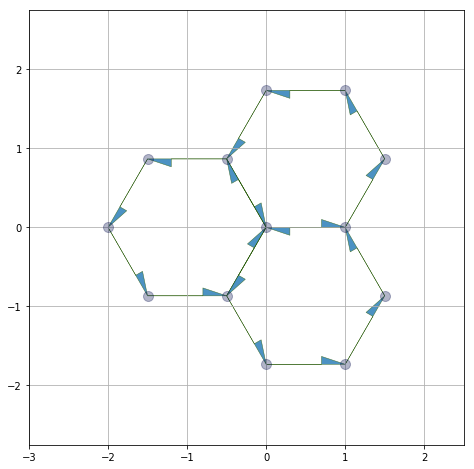

In [8]:
fig, ax = sheet_view(sheet, ['x', 'y'])


ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))
    


In [9]:
col0 = ax.collections[0]

In [10]:
col0.get_edgecolors()

array([[0.        , 0.03921569, 0.29411765, 0.3       ]])

#### Coloring

In [11]:

## Let's add a column to sheet.vert_df
sheet.vert_df['rand'] = np.linspace(0.0, 1.0, num=sheet.vert_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.vert_df.rand)

draw_specs['vert']['color'] = color_cmap
draw_specs['vert']['alpha'] = 0.5
draw_specs['vert']['s'] = 500

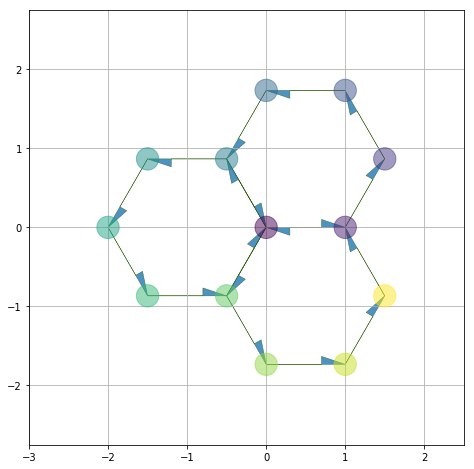

In [12]:
coords = ['x', 'y']
fig, ax = sheet_view(sheet, coords, **draw_specs)

ax.set_xlim(-3, 2.5)
ax.set_ylim(-2.75, 2.75)
fig.set_size_inches((8, 8))

In [13]:
col0 = ax.collections[1]
col0.get_facecolors()

array([[0.12156863, 0.46666667, 0.70588235, 0.8       ]])

#### Filling the cells



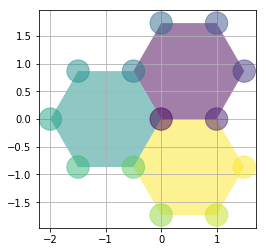

In [14]:
sheet.face_df['col'] = np.linspace(0.0, 1.0, 
                                    num=sheet.face_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
color_cmap = cmap(sheet.face_df.col)

draw_specs['edge']['visible'] = False

draw_specs['face']['visible'] = True
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5


fig, ax = sheet_view(sheet, coords, **draw_specs)

In [15]:
draw_specs['edge']['visible'] = True

#draw_specs['face']['visible'] = False
draw_specs['face']['color'] = color_cmap
draw_specs['face']['alpha'] = 0.5

edge_color = np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

cmap = plt.cm.get_cmap('viridis')
edge_cmap = cmap(edge_color)
draw_specs['edge']['color'] = edge_cmap #[0, 0, 0, 1]
#draw_specs['edge']['color'] = [0, 0, 0, 0.2]

draw_specs['edge']['width'] = 8. * np.linspace(0.0, 1.0, 
                        num=sheet.edge_df.shape[0])

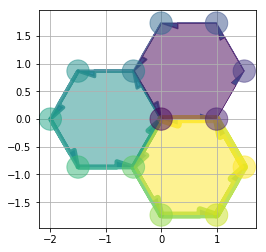

In [16]:
fig, ax = sheet_view(sheet, coords, **draw_specs)

### Vispy based

(Currently broken - problems with matplotlib 2.2+ on vispy part)

In [17]:
from tyssue.draw.vispy_draw import vp_view

/home/guillaume/miniconda3/envs/py36/lib/python3.6/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


In [18]:
# vp_view(sheet)

## Ipyvolume based

In [20]:
from tyssue import Monolayer, config
from tyssue.generation import extrude

extruded = extrude(sheet.datasets, method='translation')
specs = config.geometry.bulk_spec()
monolayer = Monolayer('mono', extruded, specs)


from tyssue.draw.ipv_draw import view_ipv
import ipyvolume as ipv
ipv.clear()
fig2, mesh = view_ipv(monolayer)
fig2

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array('#2b5d0a', dtype='<U7'), lines=array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  0],
       [ 0,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9,  0],
       [ 0,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  0],
       [14, 13],
       [15, 14],
       [16, 15],
       [17, 16],
       [18, 17],
       [13, 18],
       [18, 13],
       [19, 18],
       [20, 19],
       [21, 20],
       [22, 21],
       [13, 22],
       [22, 13],
       [23, 22],
       [24, 23],
       [25, 24],
       [14, 25],
       [13, 14],
       [ 1,  0],
       [ 0, 13],
       [13, 14],
       [14,  1],
       [ 2,  1],
       [ 1, 14],
       [14, 15],
       [15,  2],
       [ 3,  2],
       [ 2, 15],
       [15, 16],
       [16,  3],
       [ 4,  3],
       [ 3, 16],
       [16, 17],
       [17,  4],
       [ 5,  4],
       [ 4, 17],
       [17, 18],
       [18,  5],
       [ 0,  5],
       [ 5, 18],
       [18, 13],
       [13,  0],
       [ 5,  0],
       [ 0, 13],
       [13, 18],
       [18,  5],
       [ 6,  5],
       [ 5, 18],
       [18, 19],
       [19,  6],
       [ 7,  6],
       [ 6, 19],
       [19, 20],
       [20,  7],
       [ 8,  7],
       [ 7, 20],
       [20, 21],
       [21,  8],
       [ 9,  8],
       [ 8, 21],
       [21, 22],
       [22,  9],
       [ 0,  9],
       [ 9, 22],
       [22, 13],
       [13,  0],
       [ 9,  0],
       [ 0, 13],
       [13, 22],
       [22,  9],
       [10,  9],
       [ 9, 22],
       [22, 23],
       [23, 10],
       [11, 10],
       [10, 23],
       [23, 24],
       [24, 11],
       [12, 11],
       [11, 24],
       [24, 25],
       [25, 12],
       [ 1, 12],
       [12, 25],
       [25, 14],
       [14,  1],
       [ 0,  1],
       [ 1, 14],
       [14, 13],
       [13,  0]], dtype=uint32), texture=None, x=array([ 0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5, -0.5,  0. ,
        1. ,  1.5,  0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5,
       -0.5,  0. ,  1. ,  1.5]), y=array([ 0.   ,  0.   ,  0.866,  1.732,  1.732,  0.866,  0.866,  0.   ,
       -0.866, -0.866, -1.732, -1.732, -0.866,  0.   ,  0.   ,  0.866,
        1.732,  1.732,  0.866,  0.866,  0.   , -0.866, -0.866, -1.732,
       -1.732, -0.866]), z=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-2.175, 1.907], ylim=[-2.175, 1.907], zlim=[-2.175, 1.907])

### Vertex based color

In [21]:
color = (monolayer.vert_df.x**2
         + monolayer.vert_df.y**2
         + monolayer.vert_df.z**2)

ipv.clear()
fig2, mesh = view_ipv(monolayer, color=color)
fig2

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.267004, 0.004874, 0.329415],
       [0.253935, 0.265254, 0.529983],
       [0.134692, 0.658636, 0.517649],
       [0.477504, 0.821444, 0.318195],
       [0.134692, 0.658636, 0.517649],
       [0.253935, 0.265254, 0.529983],
       [0.134692, 0.658636, 0.517649],
       [0.477504, 0.821444, 0.318195],
       [0.134692, 0.658636, 0.517649],
       [0.253935, 0.265254, 0.529983],
       [0.134692, 0.658636, 0.517649],
       [0.477504, 0.821444, 0.318195],
       [0.134692, 0.658636, 0.517649],
       [0.253935, 0.265254, 0.529983],
       [0.163625, 0.471133, 0.558148],
       [0.477504, 0.821444, 0.318195],
       [0.993248, 0.906157, 0.143936],
       [0.477504, 0.821444, 0.318195],
       [0.163625, 0.471133, 0.558148],
       [0.477504, 0.821444, 0.318195],
       [0.993248, 0.906157, 0.143936],
       [0.477504, 0.821444, 0.318195],
       [0.163625, 0.471133, 0.558148],
       [0.477504, 0.821444, 0.318195],
       [0.993248, 0.906157, 0.143936],
       [0.477504, 0.821444, 0.318195]]), lines=array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  0],
       [ 0,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9,  0],
       [ 0,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  0],
       [14, 13],
       [15, 14],
       [16, 15],
       [17, 16],
       [18, 17],
       [13, 18],
       [18, 13],
       [19, 18],
       [20, 19],
       [21, 20],
       [22, 21],
       [13, 22],
       [22, 13],
       [23, 22],
       [24, 23],
       [25, 24],
       [14, 25],
       [13, 14],
       [ 1,  0],
       [ 0, 13],
       [13, 14],
       [14,  1],
       [ 2,  1],
       [ 1, 14],
       [14, 15],
       [15,  2],
       [ 3,  2],
       [ 2, 15],
       [15, 16],
       [16,  3],
       [ 4,  3],
       [ 3, 16],
       [16, 17],
       [17,  4],
       [ 5,  4],
       [ 4, 17],
       [17, 18],
       [18,  5],
       [ 0,  5],
       [ 5, 18],
       [18, 13],
       [13,  0],
       [ 5,  0],
       [ 0, 13],
       [13, 18],
       [18,  5],
       [ 6,  5],
       [ 5, 18],
       [18, 19],
       [19,  6],
       [ 7,  6],
       [ 6, 19],
       [19, 20],
       [20,  7],
       [ 8,  7],
       [ 7, 20],
       [20, 21],
       [21,  8],
       [ 9,  8],
       [ 8, 21],
       [21, 22],
       [22,  9],
       [ 0,  9],
       [ 9, 22],
       [22, 13],
       [13,  0],
       [ 9,  0],
       [ 0, 13],
       [13, 22],
       [22,  9],
       [10,  9],
       [ 9, 22],
       [22, 23],
       [23, 10],
       [11, 10],
       [10, 23],
       [23, 24],
       [24, 11],
       [12, 11],
       [11, 24],
       [24, 25],
       [25, 12],
       [ 1, 12],
       [12, 25],
       [25, 14],
       [14,  1],
       [ 0,  1],
       [ 1, 14],
       [14, 13],
       [13,  0]], dtype=uint32), texture=None, x=array([ 0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5, -0.5,  0. ,
        1. ,  1.5,  0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5,
       -0.5,  0. ,  1. ,  1.5]), y=array([ 0.   ,  0.   ,  0.866,  1.732,  1.732,  0.866,  0.866,  0.   ,
       -0.866, -0.866, -1.732, -1.732, -0.866,  0.   ,  0.   ,  0.866,
        1.732,  1.732,  0.866,  0.866,  0.   , -0.866, -0.866, -1.732,
       -1.732, -0.866]), z=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-2.175, 1.907], ylim=[-2.175, 1.907], zlim=[-2.175, 1.907])

#### Edge based color

In [23]:
color = monolayer.edge_df['dy']
ipv.clear()
fig2, mesh = view_ipv(monolayer, color=color)
fig2

Figure(camera_center=[0.0, 0.0, 0.0], height=500, matrix_projection=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], matrix_world=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], meshes=[Mesh(color=array([[0.127568, 0.566949, 0.550556],
       [0.127568, 0.566949, 0.550556],
       [0.127568, 0.566949, 0.550556],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.229739, 0.322361, 0.545706],
       [0.267004, 0.004874, 0.329415],
       [0.127568, 0.566949, 0.550556],
       [0.993248, 0.906157, 0.143936],
       [0.369214, 0.788888, 0.382914],
       [0.993248, 0.906157, 0.143936],
       [0.993248, 0.906157, 0.143936],
       [0.127568, 0.566949, 0.550556],
       [0.127568, 0.566949, 0.550556],
       [0.127568, 0.566949, 0.550556],
       [0.127568, 0.566949, 0.550556],
       [0.267004, 0.004874, 0.329415],
       [0.267004, 0.004874, 0.329415],
       [0.229739, 0.322361, 0.545706],
       [0.267004, 0.004874, 0.329415],
       [0.127568, 0.566949, 0.550556],
       [0.993248, 0.906157, 0.143936],
       [0.369214, 0.788888, 0.382914],
       [0.993248, 0.906157, 0.143936],
       [0.993248, 0.906157, 0.143936],
       [0.127568, 0.566949, 0.550556]]), lines=array([[ 0,  1],
       [ 1,  2],
       [ 2,  3],
       [ 3,  4],
       [ 4,  5],
       [ 5,  0],
       [ 0,  5],
       [ 5,  6],
       [ 6,  7],
       [ 7,  8],
       [ 8,  9],
       [ 9,  0],
       [ 0,  9],
       [ 9, 10],
       [10, 11],
       [11, 12],
       [12,  1],
       [ 1,  0],
       [14, 13],
       [15, 14],
       [16, 15],
       [17, 16],
       [18, 17],
       [13, 18],
       [18, 13],
       [19, 18],
       [20, 19],
       [21, 20],
       [22, 21],
       [13, 22],
       [22, 13],
       [23, 22],
       [24, 23],
       [25, 24],
       [14, 25],
       [13, 14],
       [ 1,  0],
       [ 0, 13],
       [13, 14],
       [14,  1],
       [ 2,  1],
       [ 1, 14],
       [14, 15],
       [15,  2],
       [ 3,  2],
       [ 2, 15],
       [15, 16],
       [16,  3],
       [ 4,  3],
       [ 3, 16],
       [16, 17],
       [17,  4],
       [ 5,  4],
       [ 4, 17],
       [17, 18],
       [18,  5],
       [ 0,  5],
       [ 5, 18],
       [18, 13],
       [13,  0],
       [ 5,  0],
       [ 0, 13],
       [13, 18],
       [18,  5],
       [ 6,  5],
       [ 5, 18],
       [18, 19],
       [19,  6],
       [ 7,  6],
       [ 6, 19],
       [19, 20],
       [20,  7],
       [ 8,  7],
       [ 7, 20],
       [20, 21],
       [21,  8],
       [ 9,  8],
       [ 8, 21],
       [21, 22],
       [22,  9],
       [ 0,  9],
       [ 9, 22],
       [22, 13],
       [13,  0],
       [ 9,  0],
       [ 0, 13],
       [13, 22],
       [22,  9],
       [10,  9],
       [ 9, 22],
       [22, 23],
       [23, 10],
       [11, 10],
       [10, 23],
       [23, 24],
       [24, 11],
       [12, 11],
       [11, 24],
       [24, 25],
       [25, 12],
       [ 1, 12],
       [12, 25],
       [25, 14],
       [14,  1],
       [ 0,  1],
       [ 1, 14],
       [14, 13],
       [13,  0]], dtype=uint32), texture=None, x=array([ 0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5, -0.5,  0. ,
        1. ,  1.5,  0. ,  1. ,  1.5,  1. ,  0. , -0.5, -1.5, -2. , -1.5,
       -0.5,  0. ,  1. ,  1.5]), y=array([ 0.   ,  0.   ,  0.866,  1.732,  1.732,  0.866,  0.866,  0.   ,
       -0.866, -0.866, -1.732, -1.732, -0.866,  0.   ,  0.   ,  0.866,
        1.732,  1.732,  0.866,  0.866,  0.   , -0.866, -0.866, -1.732,
       -1.732, -0.866]), z=array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]))], style={'axes': {'visible': False, 'label': {'color': 'white'}, 'ticklabel': {'color': 'white'}, 'color': 'white'}, 'box': {'visible': False}, 'background-color': 'black'}, tf=None, width=400, xlim=[-2.175, 1.907], ylim=[-2.175, 1.907], zlim=[-2.175, 1.907])